# Load Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Twitter/Panas/Data/panas.csv')
df = pd.DataFrame(df)

In [3]:
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1778611142069485641,Fri Apr 12 02:28:35 +0000 2024,184,keren ya stiap ada pemberitaan SN di portal ge...,1778611142069485641,https://pbs.twimg.com/media/GK7lZyLbIAAcTVM.jpg,NaN,in,"Bali, Indonesia",2,8,27,https://twitter.com/depakariana/status/1778611...,1215029989801725952,depakariana
1,1778631161788731693,Fri Apr 12 03:48:08 +0000 2024,10,UNISEX PARFUME ANTI BAU APEK SAAT PANAS PANAS ...,1778631161788731693,https://pbs.twimg.com/media/GK73mfeboAEl12k.jpg,NaN,in,NaN,0,1,1,https://twitter.com/Tokoh_Opah/status/17786311...,1665341241524092928,Tokoh_Opah
2,1778641771607838772,Fri Apr 12 04:30:18 +0000 2024,20,bt panas banget https://t.co/narvNwIrLl,1778641771607838772,https://pbs.twimg.com/media/GK8BQthaMAE5fUg.jpg,NaN,in,they/she 🏳️‍⚧️,0,3,0,https://twitter.com/karyailmuah/status/1778641...,1032640539915472896,karyailmuah
3,1778612601179840893,Fri Apr 12 02:34:23 +0000 2024,165,makanan yg dipesen youngk di PC Bang: - Jjagye...,1778612601179840893,https://pbs.twimg.com/ext_tw_video_thumb/17786...,NaN,in,BrianKang YoungK KangYounghyun,15,1,57,https://twitter.com/mrsjungchanwoo/status/1778...,772455107107561472,mrsjungchanwoo
4,1778598092109140233,Fri Apr 12 01:36:44 +0000 2024,348,guys tangan ibuku tiba2 kayak melepuh gini pa...,1778598092109140233,https://pbs.twimg.com/media/GK7ZiWEbcAAGwdD.jpg,NaN,in,NaN,6,85,8,https://twitter.com/convomfs/status/1778598092...,1284061445148209154,convomfs


In [4]:
df.columns

Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username'],
      dtype='object')

In [4]:
#mengambil data yang diperlukan saja
df = df[['created_at', 'full_text']]
df.head()

,created_at,full_text
0,Fri Apr 12 02:28:35 +0000 2024,keren ya stiap ada pemberitaan SN di portal ge...
1,Fri Apr 12 03:48:08 +0000 2024,UNISEX PARFUME ANTI BAU APEK SAAT PANAS PANAS ...
2,Fri Apr 12 04:30:18 +0000 2024,bt panas banget https://t.co/narvNwIrLl
3,Fri Apr 12 02:34:23 +0000 2024,makanan yg dipesen youngk di PC Bang: - Jjagye...
4,Fri Apr 12 01:36:44 +0000 2024,guys tangan ibuku tiba2 kayak melepuh gini pa...


# EDA

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  69 non-null     object
 1   full_text   69 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

created_at    0
full_text     0
dtype: int64

1. ubah created_at menjadi datetime
2. Tidak ada data terduplikat
3. Data terisi semua

# Cleanning Data

In [7]:
# ubah tanggal
df['created_at'] = pd.to_datetime(df['created_at'])

<ipython-input-7-54de65a7f82e>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])


In [8]:
df['hari'] = df['created_at'].dt.day_name()
df.head()

,created_at,full_text,hari
0,2024-04-12 02:28:35+00:00,keren ya stiap ada pemberitaan SN di portal ge...,Friday
1,2024-04-12 03:48:08+00:00,UNISEX PARFUME ANTI BAU APEK SAAT PANAS PANAS ...,Friday
2,2024-04-12 04:30:18+00:00,bt panas banget https://t.co/narvNwIrLl,Friday
3,2024-04-12 02:34:23+00:00,makanan yg dipesen youngk di PC Bang: - Jjagye...,Friday
4,2024-04-12 01:36:44+00:00,guys tangan ibuku tiba2 kayak melepuh gini pa...,Friday


<Axes: ylabel='hari'>

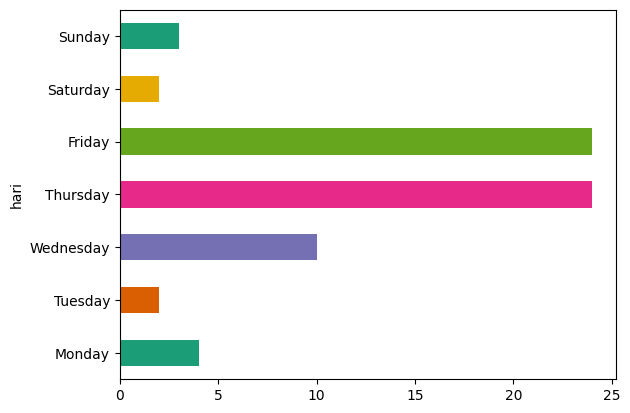

In [9]:
nama_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['hari'] = pd.Categorical(df['hari'], categories=nama_hari, ordered=True)
hari_counts = df['hari'].value_counts()
hari_counts = hari_counts.sort_index()
hari_counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

Dapat dilihat bahwa tweet terbanyak membahasa tentang panas pada hari Kamis dan Jumat

In [10]:
jumlah_pertanggal = df['created_at'].dt.date.value_counts().sort_values()
jumlah_pertanggal

created_at
2024-04-05     1
2024-04-06     2
2024-04-09     2
2024-04-07     3
2024-04-08     4
2024-04-04     6
2024-04-10    10
2024-04-11    18
2024-04-12    23
Name: count, dtype: int64

<Axes: xlabel='created_at'>

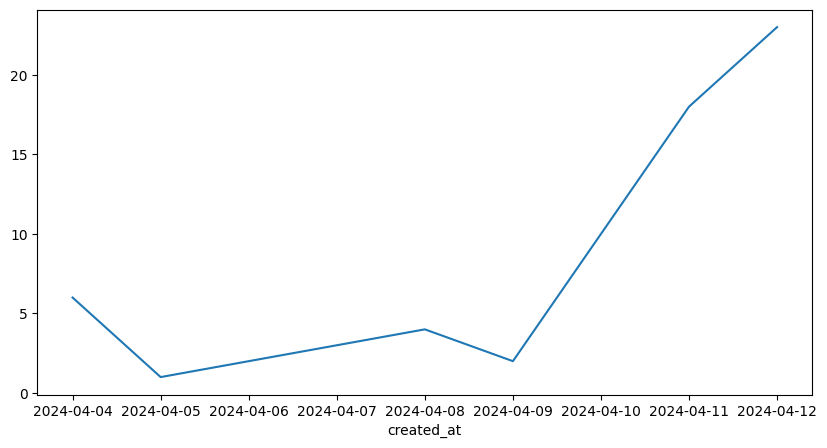

In [12]:
df['created_at'].dt.date.value_counts().sort_values().plot(kind='line', figsize=(10, 5))

# Pre-Procesing Data

##Case Folding

In [14]:
slang_mapping = {
    "ak" : "aku", "aq" : "aku", "gw" : "aku",
    "gue" : "aku", "gua" : "aku", "ane" : "aku",

    "bauk" : "bau", "busk" : "busuk", "bsuk" : "busuk",
    "banget" : "sangat", "bgt" : "sangat", "bt"  : "bad mood",
    "betul" : "bener", "btul" : "bener", "bf" : "boy friend",

    "cman" : "cuman", "otw" : "on the way", "njingg" : "anjing",

    "d" : "di", "dn" : "dan", "dah" : "sudah",
    "sdh" : "sudah", '&' : "dan", "dn" : "dan",
    "dlu" : "dulu", "dl" : "dulu", "dgn" : "dengan",
    "je" : "aja",

    "ga" : "tidak", "gak" : "tidak", "gf" : "girl friend",
    "tak" : "tidak", "tk" : "tidak", "idup" : "hidup",
    "g" : "gak", "gx" : "gak",
    "gede" : "besar", "gini" : "seperti ini",

    "ni" : "ini", "in" : "ini", "nak" : "mau",
    "nmpk" : "lihat", "mmg" : "memang", "mng" : "mungkin",
    "mw" : "mau", "nii" : "ini", "korang" : "engaku",
    "mcm" : "macam", "lemes" : "lemas",

    "pans" : "panas", "pnas" : "panas", "pdhal" : "padahal",

    "raye" : "raya", "lu":"kamu",

    "stiap": "setiap", "stp": "setiap", "skrg" : "sekarang",
    "setyp": "setiap", "sn" : 'sana',
    "sy" : "saya", "skit" : "sakit", "sbb" : "sebab",

    "tuh" : "itu", "it" : "itu", "tu" : "itu",
    "tdk" : "tidak", "t" : "itu",
    "tp" : "tapi",

    "rede" : "redah", "sm" : "sama",

    "utk" : "untuk",
    "pls" : "please",

    "yg" : "yang", "ye":"ya"
}

In [15]:
df['full_text'] = df['full_text'].str.lower()

In [16]:
import re

def normalize_slang(text):
  # remove mention, link, hashtag
  text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
  #remove semua kalimat pada slang_mapping menjadi bener
  text = ' '.join([slang_mapping[word] if word in slang_mapping else word for word in text.split()])

  text = re.sub(r'[^a-zA-Z\s]', '', text)
  # remove url yang tidak lengkap
  return text.replace("http://", " ").replace("https://", " ")

# Menerapkan normalisasi pada setiap baris teks dalam DataFrame
df['full_text_normalized'] = df['full_text'].apply(lambda x: normalize_slang(x))

In [17]:
df.sample(10)

,created_at,full_text,hari,full_text_normalized
25,2024-04-12 01:20:42+00:00,muslim bangladesh/pakistan ni dahsyat kot bab ...,Friday,muslim bangladeshpakistan ini dahsyat kot bab ...
65,2024-04-06 04:40:34+00:00,info bpptkg: terjadi awan panas guguran di gun...,Saturday,info bpptkg terjadi awan panas guguran di gunu...
29,2024-04-10 12:18:25+00:00,bahana bertanya soalan panas 3 makcik tumbang....,Wednesday,bahana bertanya soalan panas makcik tumbang
34,2024-04-04 18:20:17+00:00,memanas smakin panas ‼️ 'pengunjuk rasa menero...,Thursday,memanas smakin panas pengunjuk rasa menerobos...
18,2024-04-04 22:00:35+00:00,lepas raya ni nak lunch dekat tempat kerja pun...,Thursday,lepas raya ini mau lunch dekat tempat kerja pu...
10,2024-04-10 16:53:59+00:00,capresnya kalah relawannya masih panas...ga bi...,Wednesday,capresnya kalah relawannya masih panasga bisa ...
27,2024-04-12 00:35:43+00:00,semoga ppw dapet series lagi biar yang panas t...,Friday,semoga ppw dapet series lagi biar yang panas t...
17,2024-04-11 11:12:46+00:00,ni bukan posed. ni betul panas https://t.co/oy...,Thursday,ini bukan posed ini bener panas
8,2024-04-12 01:22:27+00:00,widihh baru juga sehari lewat lebaran&amp; ram...,Friday,widihh baru juga sehari lewat lebaranamp ramad...
21,2024-04-11 13:55:08+00:00,timeline panas sekali hari ini jadi sudah saat...,Thursday,timeline panas sekali hari ini jadi sudah saat...


##Tokenization

In [18]:
import nltk
from nltk.tokenize import word_tokenize

# Pastikan modul nltk telah diimpor dan data punkt telah diunduh
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# Buat kolom baru untuk menyimpan token
df['tokens'] = df['full_text_normalized'].apply(lambda x: word_tokenize(x))

# Tampilkan DataFrame yang telah diperbarui
df.head()

,created_at,full_text,hari,full_text_normalized,tokens
0,2024-04-12 02:28:35+00:00,keren ya stiap ada pemberitaan sn di portal ge...,Friday,keren ya setiap ada pemberitaan sana di portal...,"[keren, ya, setiap, ada, pemberitaan, sana, di..."
1,2024-04-12 03:48:08+00:00,unisex parfume anti bau apek saat panas panas ...,Friday,unisex parfume anti bau apek saat panas panas ...,"[unisex, parfume, anti, bau, apek, saat, panas..."
2,2024-04-12 04:30:18+00:00,bt panas banget https://t.co/narvnwirll,Friday,bad mood panas sangat,"[bad, mood, panas, sangat]"
3,2024-04-12 02:34:23+00:00,makanan yg dipesen youngk di pc bang: - jjagye...,Friday,makanan yang dipesen youngk di pc bang jjagye...,"[makanan, yang, dipesen, youngk, di, pc, bang,..."
4,2024-04-12 01:36:44+00:00,guys tangan ibuku tiba2 kayak melepuh gini pa...,Friday,guys tangan ibuku tiba kayak melepuh seperti i...,"[guys, tangan, ibuku, tiba, kayak, melepuh, se..."


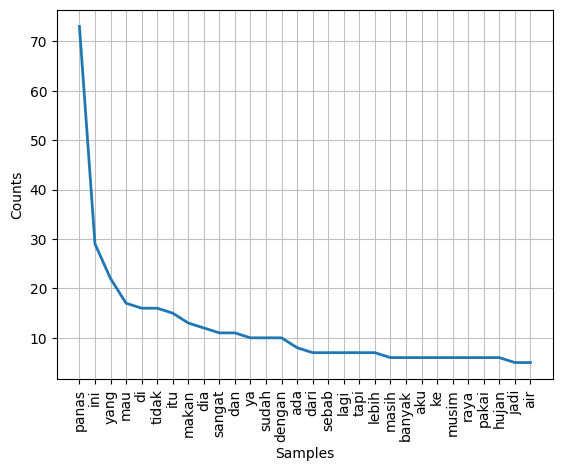

In [20]:
#melihat frequensi data
from nltk.probability import FreqDist

df_tokens = df['tokens'].explode()
token_counts = df_tokens.value_counts()

# Buat objek FreqDist untuk menghitung frekuensi kemunculan
kemunculan = FreqDist(df_tokens)

# Plot 30 token teratas
kemunculan.plot(30, cumulative=False)
plt.show()

Kata panas merupakan kata yang paling banyak muncul, hal ini dikarenakan memang yang ingin kita analisa adalah tweet dari user yang membahas mengenai panas.

##Filtering

In [21]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
list_stopword = set(stopwords.words('indonesian'))

list_stopword.update(["ny", "d", 'klo', 'kalo', 'amp', 'bikin', 'e', 'cok', 'njing','krn', 'nya', 'nih', 'sih', 'si', 'tau', 'utk', 'ya','jd',
                      'jgn', 'sdh', 'aja', 'n', 't', 'wkwk', 'haha', 'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt', '&amp', 'yah', 'hahaha', 'bjir',
                      'we', 'lol', 'la', 'wkwk', 'doang', 'satttt', 'pake', 'lagi', 'lgi', 'ahh', 'i', 'ni'])

# Inisialisasi list untuk menyimpan token yang sudah difilter
filtered_tokens = []

# Loop melalui setiap baris di DataFrame
for tokens_list in df['tokens']:
    # Inisialisasi list untuk menyimpan token yang sudah difilter untuk setiap baris
    filtered_row_tokens = []
    # Loop melalui setiap token dalam list token untuk baris tertentu
    for token in tokens_list:
        # Periksa apakah token tidak termasuk dalam list_stopword
        if token not in list_stopword:
            # Jika tidak termasuk, tambahkan token ke dalam list filtered_row_tokens
            filtered_row_tokens.append(token)
    # Tambahkan list token yang sudah difilter untuk baris tertentu ke dalam filtered_tokens
    filtered_tokens.append(filtered_row_tokens)

# Tambahkan kolom baru 'filtered_tokens' ke dalam DataFrame dan isi dengan filtered_tokens
df['filtered_tokens'] = filtered_tokens

In [23]:
df.sample(5)

,created_at,full_text,hari,full_text_normalized,tokens,filtered_tokens
20,2024-04-08 09:10:34+00:00,no insecure insecure :) *thailand panas bgt bj...,Monday,no insecure insecure thailand panas sangat bjir,"[no, insecure, insecure, thailand, panas, sang...","[no, insecure, insecure, thailand, panas]"
37,2024-04-09 01:51:18+00:00,ramai ramai anak sedara aku ni kan ada sorang ...,Tuesday,ramai ramai anak sedara aku ini kan ada sorang...,"[ramai, ramai, anak, sedara, aku, ini, kan, ad...","[ramai, ramai, anak, sedara, sorang, jenis, ka..."
58,2024-04-04 11:36:51+00:00,ternyata cuaca di sea lagi panas-panasnya guys...,Thursday,ternyata cuaca di sea lagi panaspanasnya guys ...,"[ternyata, cuaca, di, sea, lagi, panaspanasnya...","[cuaca, sea, panaspanasnya, guys, hujan, cerah..."
46,2024-04-12 03:17:50+00:00,yang bilang jakarta itu ga enak untuk sepedaan...,Friday,yang bilang jakarta itu tidak enak untuk seped...,"[yang, bilang, jakarta, itu, tidak, enak, untu...","[bilang, jakarta, enak, sepedaan, panas, seped..."
10,2024-04-10 16:53:59+00:00,capresnya kalah relawannya masih panas...ga bi...,Wednesday,capresnya kalah relawannya masih panasga bisa ...,"[capresnya, kalah, relawannya, masih, panasga,...","[capresnya, kalah, relawannya, panasga, terima..."


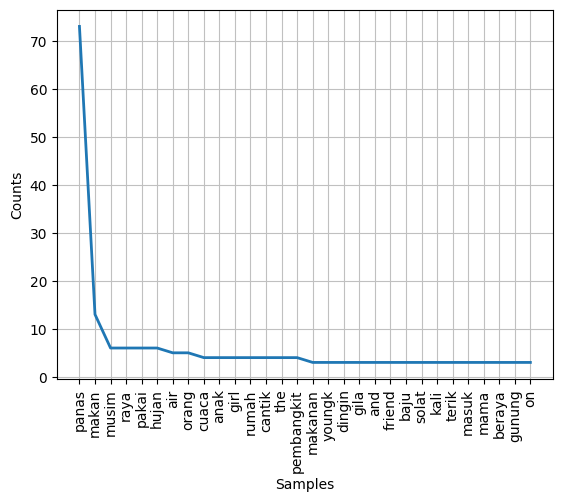

In [24]:
filter= df['filtered_tokens'].explode()
filter_counts = filter.value_counts()

# Buat objek FreqDist untuk menghitung frekuensi kemunculan
kemunculan = FreqDist(filter)

# Plot 30 token teratas
kemunculan.plot(30, cumulative=False)
plt.show()

## Stemming

###sastrawi

In [25]:
!pip install Sastrawi

In [26]:
!pip install swifter

In [27]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['filtered_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

625
------------------------
keren : keren
pemberitaan : berita
portal : portal
sorotan : sorot
haters : haters
wkwkwkwk : wkwkwkwk
panas : panas
unisex : unisex
parfume : parfume
anti : anti
bau : bau
apek : apek
san : san
a : a
thread : thread
bad : bad
mood : mood
makanan : makan
dipesen : sen
youngk : youngk
pc : pc
bang : bang
jjagyechi : jjagyechi
jajangmyeom : jajangmyeom
telur : telur
keju : keju
galbi : galbi
dumplings : dumplings
toowoomba : toowoomba
ramen : ramen
sanuki : sanuki
udon : udon
curry : curry
rabokki : rabokki
makan : makan
pesen : sen
didiemin : didiemin
bentar : bentar
guys : guys
tangan : tangan
ibuku : ibu
kayak : kayak
melepuh : lepuh
kena : kena
apipanas : apipanas
manajer : manajer
noona : noona
member : member
kerja : kerja
hobby : hobby
apapunhobby : apapunhobby
problem : problem
bri : bri
tolong : tolong
akutuh : akutuh
gabisa : gabisa
biarin : biarin
biar : biar
dingin : dingin
gitu : gitu
game : game
tour : tour
de : de
purbalingga : purbalingga
haha

In [28]:
# apply stemmed term to dataframe
def get_stemmed_term(document):
    d_clean = []
    d_clean = ' '.join([term_dict[term] for term in document])
    return [term_dict[term] for term in document]

df['stemmed'] = df['filtered_tokens'].apply(get_stemmed_term)
print(df['stemmed'])

0     [keren, berita, portal, sorot, haters, wkwkwkw...
1     [unisex, parfume, anti, bau, apek, panas, pana...
2                                    [bad, mood, panas]
3     [makan, sen, youngk, pc, bang, jjagyechi, jaja...
4     [guys, tangan, ibu, kayak, lepuh, kena, apipanas]
                            ...                        
64          [diri, panas, on, the, way, ngadem, malang]
65    [info, bpptkg, awan, panas, gugur, gunung, tan...
66    [enak, kali, jalan, sepi, angin, adem, angin, ...
67    [halo, nama, wawa, singkat, ww, or, w, or, wa,...
68                              [cantik, langit, panas]
Name: stemmed, Length: 69, dtype: object


In [29]:
df.stemmed

0     [keren, berita, portal, sorot, haters, wkwkwkw...
1     [unisex, parfume, anti, bau, apek, panas, pana...
2                                    [bad, mood, panas]
3     [makan, sen, youngk, pc, bang, jjagyechi, jaja...
4     [guys, tangan, ibu, kayak, lepuh, kena, apipanas]
                            ...                        
64          [diri, panas, on, the, way, ngadem, malang]
65    [info, bpptkg, awan, panas, gugur, gunung, tan...
66    [enak, kali, jalan, sepi, angin, adem, angin, ...
67    [halo, nama, wawa, singkat, ww, or, w, or, wa,...
68                              [cantik, langit, panas]
Name: stemmed, Length: 69, dtype: object

In [30]:
# Definisikan fungsi untuk menggabungkan kata-kata menjadi kalimat
def join_tokens(tokens):
    # Gabungkan kata-kata menggunakan spasi sebagai pemisah
    return ' '.join(tokens)

# Terapkan fungsi ke setiap baris dalam kolom 'stemmed' dan simpan hasilnya dalam kolom 'stemmed_sentence'
df['stemmed_sentence'] = df['stemmed'].apply(join_tokens)

# Tampilkan kolom 'stemmed_sentence'
print(df['stemmed_sentence'])

0       keren berita portal sorot haters wkwkwkwk panas
1     unisex parfume anti bau apek panas panas san a...
2                                        bad mood panas
3     makan sen youngk pc bang jjagyechi jajangmyeom...
4             guys tangan ibu kayak lepuh kena apipanas
                            ...                        
64                  diri panas on the way ngadem malang
65    info bpptkg awan panas gugur gunung tanggal ap...
66          enak kali jalan sepi angin adem angin panas
67    halo nama wawa singkat ww or w or wa cari tema...
68                                  cantik langit panas
Name: stemmed_sentence, Length: 69, dtype: object


In [31]:
df.head()

,created_at,full_text,hari,full_text_normalized,tokens,filtered_tokens,stemmed,stemmed_sentence
0,2024-04-12 02:28:35+00:00,keren ya stiap ada pemberitaan sn di portal ge...,Friday,keren ya setiap ada pemberitaan sana di portal...,"[keren, ya, setiap, ada, pemberitaan, sana, di...","[keren, pemberitaan, portal, sorotan, haters, ...","[keren, berita, portal, sorot, haters, wkwkwkw...",keren berita portal sorot haters wkwkwkwk panas
1,2024-04-12 03:48:08+00:00,unisex parfume anti bau apek saat panas panas ...,Friday,unisex parfume anti bau apek saat panas panas ...,"[unisex, parfume, anti, bau, apek, saat, panas...","[unisex, parfume, anti, bau, apek, panas, pana...","[unisex, parfume, anti, bau, apek, panas, pana...",unisex parfume anti bau apek panas panas san a...
2,2024-04-12 04:30:18+00:00,bt panas banget https://t.co/narvnwirll,Friday,bad mood panas sangat,"[bad, mood, panas, sangat]","[bad, mood, panas]","[bad, mood, panas]",bad mood panas
3,2024-04-12 02:34:23+00:00,makanan yg dipesen youngk di pc bang: - jjagye...,Friday,makanan yang dipesen youngk di pc bang jjagye...,"[makanan, yang, dipesen, youngk, di, pc, bang,...","[makanan, dipesen, youngk, pc, bang, jjagyechi...","[makan, sen, youngk, pc, bang, jjagyechi, jaja...",makan sen youngk pc bang jjagyechi jajangmyeom...
4,2024-04-12 01:36:44+00:00,guys tangan ibuku tiba2 kayak melepuh gini pa...,Friday,guys tangan ibuku tiba kayak melepuh seperti i...,"[guys, tangan, ibuku, tiba, kayak, melepuh, se...","[guys, tangan, ibuku, kayak, melepuh, kena, ap...","[guys, tangan, ibu, kayak, lepuh, kena, apipanas]",guys tangan ibu kayak lepuh kena apipanas


#Menyimpan Data

In [32]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/Twitter/Panas/Data/panas_text_procesing.csv")